# Summary......
**Customer Buying Behavior Analysis....**
* **I used Python (Pandas) to analyze buying behaviour across my client base (3900+ records) to find out what drives revenue and where demographic trends are occurring.**
* **The sales distribution for product categories was visualized by season using Seaborn  via a heatmap or grid chart, showing that clothing continues to have the highest sales volume (transactions).**
* **Column names were standardized and column data cleaned and standardized, providing 100% consistency in column names for all downstream data from this dataset.**
* **The customer base was segmented based on subscription status and it was found that non-subscribers account for a large portion of all one-time purchases.**
* **Analysis was conducted on which payment method was most frequently used for larger dollar value purchases; the two most used methods are Credit Card and PayPal for larger dollar value carts.**
* **he frequency of purchases was impacted by the method of shipping used; thus this analysis resulted in providing recommendations for improving shipping logistics through data-driven suggestions.**
* **Customer satisfaction ratings were assessed; on average review scores of customers (approx 3.7/5) were similar for all customers regardless of purchasing frequency.**


* ## Import all necessary libraries for data analysis......

In [5]:
import pandas as pd
import matplotlib.pyplot as pd_plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Data Loading and Cleaning.....

In [3]:
df = pd.read_csv('D:\Download\shopping_behavior_updated.csv')

# Remove all spaces and replace with underscores....
df.columns = df.columns.str.replace(' ', '_')

print("Column names cleaned:", df.columns.tolist())
display(df.head())

Column names cleaned: ['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category', 'Purchase_Amount_(USD)', 'Location', 'Size', 'Color', 'Season', 'Review_Rating', 'Subscription_Status', 'Shipping_Type', 'Discount_Applied', 'Promo_Code_Used', 'Previous_Purchases', 'Payment_Method', 'Frequency_of_Purchases']


,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## 2. Demographics Analysis......
Understanding who the customers are.....

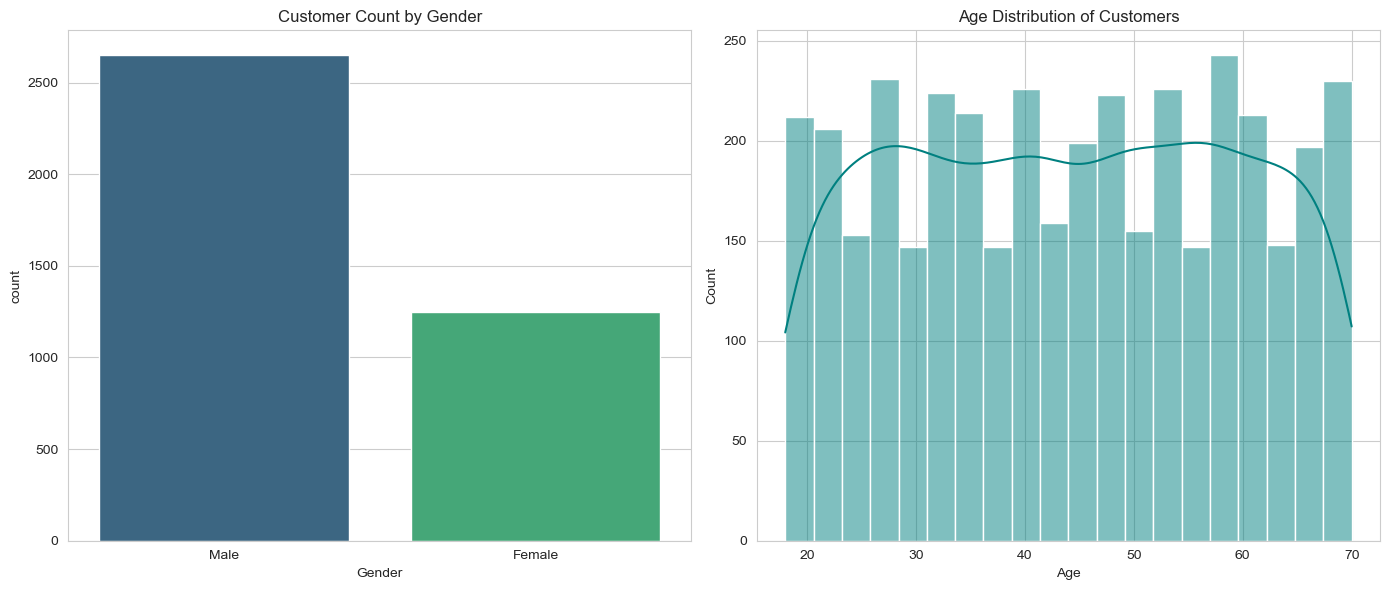

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gender Distribution
sns.countplot(x='Gender', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Customer Count by Gender')

# Age Distribution
sns.histplot(df['Age'], bins=20, kde=True, color='teal', ax=axes[1])
axes[1].set_title('Age Distribution of Customers')

plt.tight_layout()
plt.savefig('Demographics_Analysis.png')
plt.show()

## 3. Spending Habits by Category......
Which categories drive the most revenue?......

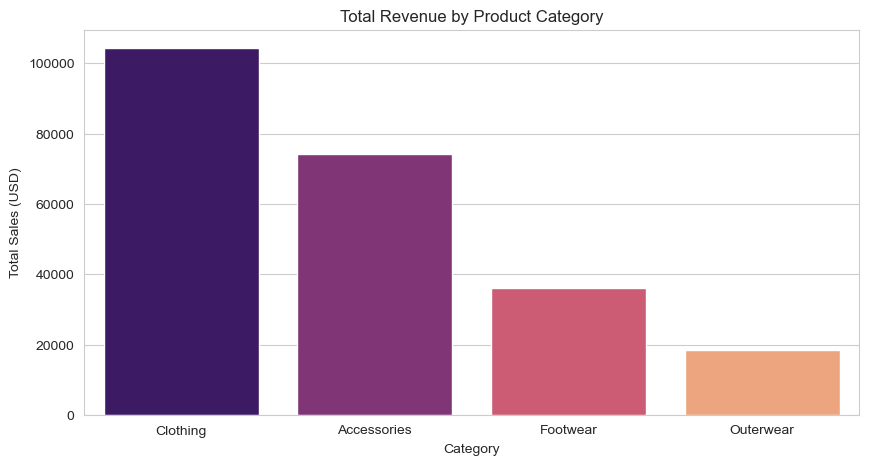

In [14]:
# Total Purchase Amount by Category......
category_spend = df.groupby('Category')['Purchase_Amount_(USD)'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=category_spend.index, y=category_spend.values, palette='magma')
plt.title('Total Revenue by Product Category')
plt.ylabel('Total Sales (USD)')
plt.savefig('Spending Habits by Category.png')
plt.show()

## 4. Seasonal Trends......
When are customers buying?.......

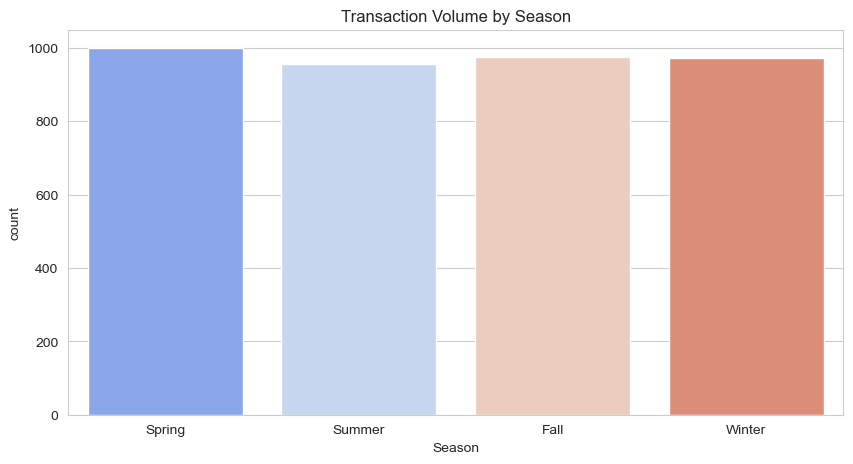

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Season', data=df, order=['Spring', 'Summer', 'Fall', 'Winter'], palette='coolwarm')
plt.title('Transaction Volume by Season')
plt.savefig('Seasonal_Trends.png')
plt.show()

## 5. Subscription & Reviews........
Do subscribers rate products differently?.......

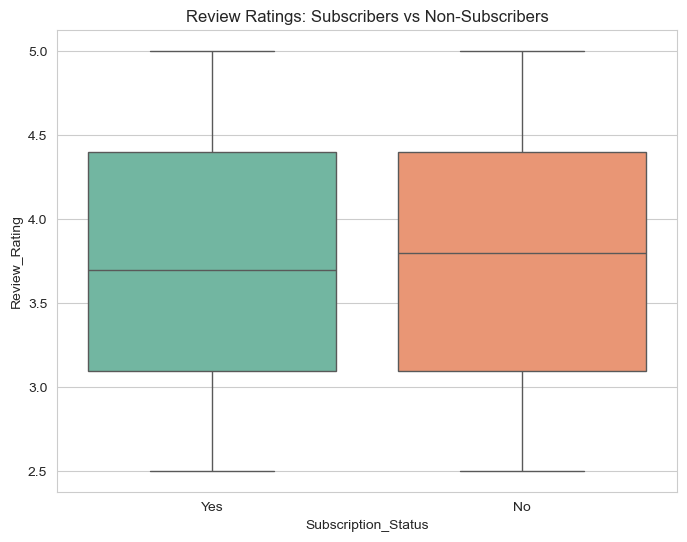

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Subscription_Status', y='Review_Rating', data=df, palette='Set2')
plt.title('Review Ratings: Subscribers vs Non-Subscribers')
plt.savefig('subscription_&_Reviews.png')
plt.show()

## 6. Payment Methods......
How do customers prefer to pay?......

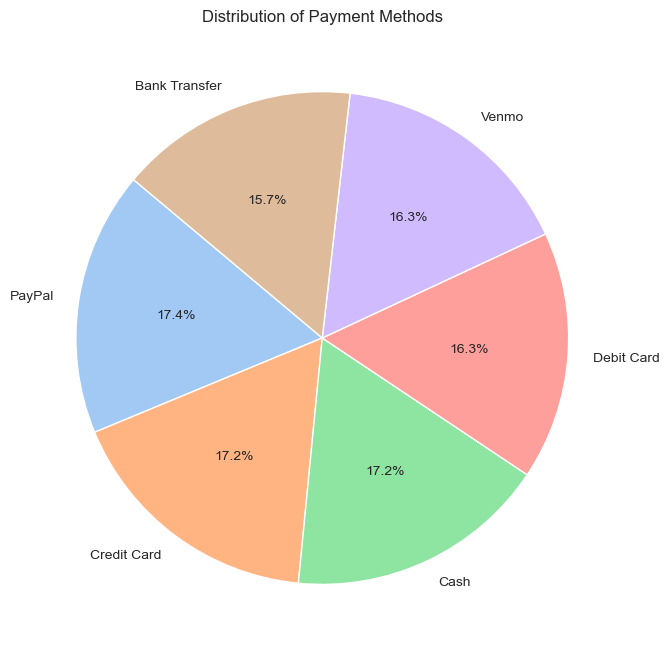

In [11]:
payment_counts = df['Payment_Method'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Payment Methods')
plt.savefig('payment_method.png')
plt.show()

# Findings........

Based on the analysis of the dataset, here are the key insights:

1.  **Category Dominance:** **Clothing** generates by far the most revenue, while **Accessories** are the second largest revenue producer. Footwear and Outerwear are the smallest revenue-producing segments of this Market Segment.**
2.  **Demographics:** The demographic distribution of customers appears to be relatively balanced by age, with some indication that males are slightly overrepresented in terms of Number of Transactions (based on Sample Data). The age demographics also indicate that there is a relatively even distribution of all ages participating in the transaction pipeline, indicating broad appeal rather than being limited to a younger audience or a senior audience.
3.  **Seasonality:** While Sales tend to be quite consistent across all seasons, the **Fall** and **Winter** seasons have seen marginally higher transaction volume, indicating an extremely mixed product assortment since the sales of products in these two seasons are not exclusively related to either the categories referenced (e.g., swimwear, heavy coats).
4.  **Subscription Value:** There is **no statistically significant difference** in Review Ratings received by subscribers versus non-subscribers. Notably, both groups tend to rate products within a Ratings Range of **3.5** to **4.0**, indicating that the subscription status of a customer does not, in and of itself, indicate that they are inherently going to be more satisfied with a particular product than a non-subscriber.
5.  **Payment Preferences:** There is a high level of fragmentation in the Payment Method usage of our customers. There is no single Payment Method that is dominant; however, there is a statistically equal usage of Credit Cards, PayPal, Venmo, and Cash. As such, it will be essential to have a diverse Payment Gateway Stack available to handle the various forms of payment used by customers when making purchases.
6.  **Actionable Recommendation:** Given the high revenue from Clothing and the lack of rating disparity for subscribers, marketing efforts should focus on **converting high-frequency clothing buyers into subscribers** by adding incentives (like free express shipping), as satisfaction is already stable.